In [10]:
!git push --force origin main

To https://github.com/Hasaannaurez/RNN-Text-generation-
 + 85e2f67...8e55d99 main -> main (forced update)


#### RNN text prediction

In [2]:
# import requests
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# import numpy as np
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

# url = "https://www.gutenberg.org/files/1661/1661-0.txt"
# response = requests.get(url)

# with open("book.txt", "w", encoding="utf-8") as f:
#     f.write(response.text)

# print("Download complete. Saved to book.txt.")

# text = open('book.txt', 'r', encoding='utf-8').read()
# text= text.lower()

# sentences = text.split('\n')

# tokenizer = Tokenizer(oov_token='<UNK>')
# tokenizer.fit_on_texts(sentences) ## this builds the vocablary

# vocab_size = len(tokenizer.word_index) + 1
# # 1 is added to consider the out of vocabulary token (i.e. ‘oov_token’) while calculating the vocabulary size
# sequences = tokenizer.texts_to_sequences(sentences)

# input_sequences = []
# for sequence in sequences:
#     for i in range(1,len(sequence)):
#         n_gram_sequence = sequence[:i+1]
#         input_sequences.append(n_gram_sequence)

# max_seq_len = max([len(seq) for seq in input_sequences])
# padded_sequences = pad_sequences(input_sequences, maxlen = max_seq_len)

# padded_sequences = np.array(padded_sequences)
# x = padded_sequences[:, :-1]
# labels  = padded_sequences[:, -1]
# # one hot encoding labels
# y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)


# #define and compile the model
# model = Sequential()
# model.add(Embedding(vocab_size, 100))
# model.add(Bidirectional(LSTM(256)))
# model.add(Dense(vocab_size, activation='softmax'))
# adam = Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
# model.build(input_shape=(None, max_seq_len - 1))
# # model.summary()

# #initialize the callback for early stopping the training if there is not at least 1% improvement in the accuracy 

# es = EarlyStopping(monitor = 'acc', min_delta=0.01)

# model.fit(x, y, epochs=50, verbose=1, batch_size=512, callbacks=[es])


In [3]:
import requests

url = "https://www.gutenberg.org/files/1661/1661-0.txt"
response = requests.get(url)

with open("book.txt", "w", encoding="utf-8") as f:
    f.write(response.text)

print("Download complete. Saved to book.txt.")


Download complete. Saved to book.txt.


In [1]:
text = open('book.txt', 'r', encoding='utf-8').read()
text= text.lower()

In [2]:
sentences = text.split('\n')
type(sentences)

list

##### so we got a list of sentences now we will be fitting a tokenizer
##### it means building a dictionary of words, where each work has a unique identifier

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

##### going ahead with tokenizing the text
##### to do this we have to initialise an object of the Tokenizer

In [4]:
tokenizer = Tokenizer(oov_token='<UNK>')

In [5]:
tokenizer.fit_on_texts(sentences) ## this builds the vocablary

In [6]:
vocab_size = len(tokenizer.word_index) + 1
# 1 is added to consider the out of vocabulary token (i.e. ‘oov_token’) while calculating the vocabulary size
vocab_size

8923

In [7]:
## this will take all the sentences and convert each word in it to number using the no.s in the word_index

sequences = tokenizer.texts_to_sequences(sentences)

In [8]:
## creating n_gram sequences, all subsets containing 1st element
input_sequences = []
for sequence in sequences:
    for i in range(1,len(sequence)):
        n_gram_sequence = sequence[:i+1]
        input_sequences.append(n_gram_sequence)

In [9]:
print(input_sequences[0])

[4776, 158]


In [10]:
## padding sequences - when we train the model all the sequences needs to be of same length
# so we will take the highest length sequence and pad all other sequence based on that

max_seq_len = max([len(seq) for seq in input_sequences])
max_seq_len

20

In [11]:
padded_sequences = pad_sequences(input_sequences, maxlen = max_seq_len)

In [12]:
print(padded_sequences[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0 4776  158]


##### Now we are approaching training part, but before that we have to make our data in input output format
##### so what we will do is that for all the sequences - we will take all the elements except the last one as input and the last element as the output

In [13]:
import numpy as np

In [14]:
padded_sequences = np.array(padded_sequences)

In [15]:
x = padded_sequences[:, :-1]
labels  = padded_sequences[:, -1]

In [16]:
# one hot encoding labels
y = tf.keras.utils.to_categorical(labels, num_classes=vocab_size)

In [17]:
y.shape, x.shape

((101523, 8923), (101523, 19))

In [18]:
## training model

In [19]:
#import dependencies for defining the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import TopKCategoricalAccuracy

In [20]:
#define and compile the model
# model = Sequential()
# model.add(Embedding(vocab_size, 128))
# model.add(Bidirectional(LSTM(256)))
# # model.add(Bidirectional(LSTM(512)))
# model.add(Dense(vocab_size, activation='softmax'))
# adam = Adam(learning_rate=0.01)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['acc'])
# model.build(input_shape=(None, max_seq_len - 1))
# model.summary()

model = Sequential()

# 1. Embedding Layer
model.add(Embedding(vocab_size, 512))

# 2. Bidirectional LSTM with Dropout
model.add(Bidirectional(LSTM(512, return_sequences=True)))
model.add(Dropout(0.3))

# 3. Another LSTM Layer (optional but better learning)
model.add(Bidirectional(LSTM(256)))
model.add(Dropout(0.3))

# 4. Output Layer
model.add(Dense(vocab_size, activation='softmax'))

# 5. Compile with smaller learning rate
adam = Adam(learning_rate=0.001)
# model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model.compile(
    loss='categorical_crossentropy',
    optimizer=adam,
    metrics=[
        'accuracy', 
        TopKCategoricalAccuracy(k=5, name='top_5_accuracy')
    ]
)

# 6. Build model
model.build(input_shape=(None, max_seq_len - 1))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 19, 512)             │       4,568,576 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 19, 1024)            │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 19, 1024)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 512)                 │       2,623,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 8923)                │       4,577,499 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,967,963 (60.91 MB)

 Trainable params: 15,967,963 (60.91 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#initialize the callback for early stopping the training if there is not at least 1% improvement in the accuracy 
from tensorflow.keras.callbacks import EarlyStopping
# es = EarlyStopping(monitor = 'acc', min_delta=0.01)
es = EarlyStopping(monitor='val_loss', patience=3, min_delta=0.01, restore_best_weights=True)

In [22]:
# model.fit(x, y, epochs=50, verbose=1, batch_size=512, callbacks=[es])
model.fit(
    x, y,
    epochs=50,
    batch_size=512,
    validation_split=0.2,  # or use validation_data=(x_val, y_val)
    callbacks=[es],
    verbose=1
)


Epoch 1/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 635s 4s/step - accuracy: 0.0507 - loss: 7.0483 - top_5_accuracy: 0.1480 - val_accuracy: 0.0512 - val_loss: 6.5528 - val_top_5_accuracy: 0.1629
Epoch 2/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 624s 4s/step - accuracy: 0.0612 - loss: 6.1724 - top_5_accuracy: 0.1819 - val_accuracy: 0.0740 - val_loss: 6.3804 - val_top_5_accuracy: 0.2003
Epoch 3/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 618s 4s/step - accuracy: 0.0895 - loss: 5.9189 - top_5_accuracy: 0.2319 - val_accuracy: 0.0933 - val_loss: 6.2415 - val_top_5_accuracy: 0.2385
Epoch 4/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 1477s 9s/step - accuracy: 0.1133 - loss: 5.6639 - top_5_accuracy: 0.2712 - val_accuracy: 0.1081 - val_loss: 6.1789 - val_top_5_accuracy: 0.2505
Epoch 5/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 587s 4s/step - accuracy: 0.1310 - loss: 5.4649 - top_5_accuracy: 0.2937 - val_accuracy: 0.1132 - val_loss: 6.1068 - val_top_5_accuracy: 0.2657
Epoch 6/50
159/159 ━━━━━━━━━━━━━━━━━━━━ 582s 4s/step - accuracy: 0.1390 - loss: 5.35

In [25]:
#Time to become storyteller!
# seed_text = "I could not help laughing at the ease with which he explained his process of deduction" 
seed_text = "the thing always appears to me to be so ridiculously simple that I could easily do it myself"          

next_words = 50
  
for _ in range(next_words):
  sequence = tokenizer.texts_to_sequences([seed_text])
  padded = pad_sequences(sequence, maxlen=max_seq_len-1)
  predicted = np.argmax(model.predict(padded, verbose=0), axis=-1)
  output_word = ''
  for word, index in tokenizer.word_index.items():
    if index == predicted:
      output_word = word
      break
  seed_text += ' ' + output_word
print(seed_text)

the thing always appears to me to be so ridiculously simple that I could easily do it myself ” he man and trees ” he asked ” he asked the man and the little man and the man and the little man and the man and the man and the little man and the little man and the little man and the little man and the little man


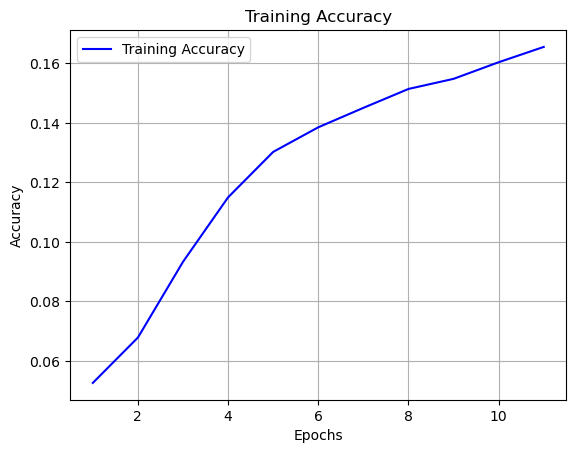

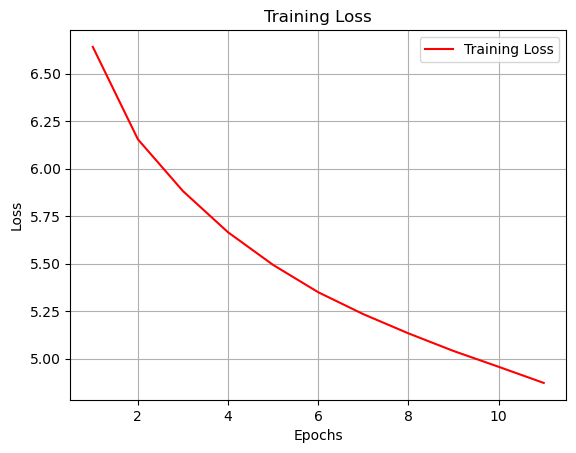

In [26]:
import matplotlib.pyplot as plt

# Suppose you ran:
# history = model.fit(...)

# Extract metrics from history
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

# Plot loss
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()
